# Calculating Viscosity from liquid compositions
- This notebook shows how to calculate Viscosity using Giordano et al. (2008)
- You can download the Excel spreadsheet from: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Other_features/Viscoity_Giordano.xlsx

In [1]:
# If you haven't done so, pip install Thermobar by removing the # symbol
#!pip install Thermobar

In [2]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

## Lets load in some melt compositions from a MELTS model published in Wieser et al. (2022)

In [3]:
Liqs_import2=pt.import_excel('Viscoity_Giordano.xlsx', sheet_name='MELTSTest', suffix="_Liq")
Liqs2=Liqs_import2['Liqs']
Liqs_input2=Liqs_import2['my_input']

## Inspect the liquid data you have loaded in to make sure it makes sense

In [4]:
Liqs2.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.508277,0.0,0.0,0.0,0.0,0
1,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.0,0.253478,0.518386,0.0,0.0,0.0,0.0,1
2,51.491657,2.771451,13.666925,11.521905,0.200504,6.275374,10.459901,2.509225,0.520502,0.0,0.268098,0.548285,0.0,0.0,0.0,0.0,2
3,51.508276,2.872896,13.569897,11.795709,0.208908,6.138356,10.217900,2.543802,0.541088,0.0,0.279336,0.571268,0.0,0.0,0.0,0.0,3
4,51.506960,3.058952,13.350351,12.214913,0.223782,5.856971,9.977521,2.592645,0.577148,0.0,0.299224,0.611940,0.0,0.0,0.0,0.0,4


## Lets calculate viscosity at the temperature stored in the column "Temp HT1987_K"
- Here, we had already calculated temperature using Helz and Thornber, which was stored in the input spreadsheet in a column named 'Temp HT1987_K'
- The dataframe Liqs_input2 contains all input columns, so we can access the values stored in this column using Liqs_input2['Temp HT1987_K']
- This temperature needs to be in Kelvin!

In [5]:
Calc_ExcelT=pt.calculate_viscosity_giordano_2008(liq_comps=Liqs2, 
                                                  T=Liqs_input2['Temp HT1987_K'])

Text(0.5, 0, 'SiO2 content Liq (Wt%)')

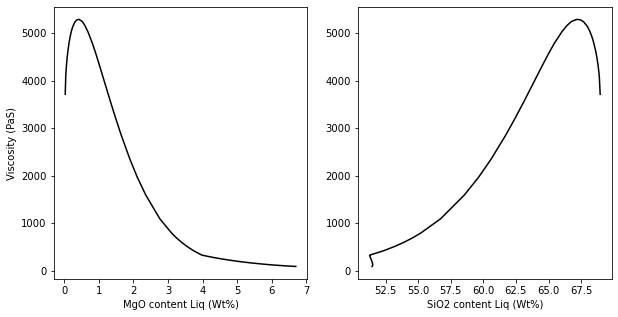

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Calc_ExcelT['MgO_Liq'], Calc_ExcelT['n_melt'], '-k')
ax2.plot(Calc_ExcelT['SiO2_Liq'], Calc_ExcelT['n_melt'], '-k')

ax1.set_ylabel('Viscosity (PaS)')
ax1.set_xlabel('MgO content Liq (Wt%)')
ax2.set_xlabel('SiO2 content Liq (Wt%)')

## Using a different thermometer for temperature
- You can get a list of all thermometers in Thermobar using the help function

In [11]:
help(pt.calculate_liq_only_temp)

Help on function calculate_liq_only_temp in module Thermobar.liquid_thermometers:

calculate_liq_only_temp(*, liq_comps, equationT, P=None, H2O_Liq=None, print=False)
     Liquid-only thermometery. Returns a temperature in Kelvin.
    
    Parameters
     -------
    
     liq_comps: pandas.DataFrame
         liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
     equationT: str
         If has _sat at the end, represents the saturation surface of that mineral.
    
         Equations from Putirka et al. (2016).
             | T_Put2016_eq3_amp_sat (saturation surface of amphibole)
    
         Equations from Putirka (2008) and older studies:
    
             | T_Put2008_eq13
             | T_Put2008_eq14
             | T_Put2008_eq15
             | T_Put2008_eq16
             | T_Put2008_eq34_cpx_sat
             | T_Put2008_eq28b_opx_sat
             | T_Put1999_cpx_sat
             * Following 3 thermometers are adaptations of olivine-liquid thermometers with  DM

### Lets use "T_Put2008_eq13"

In [19]:
CalcT_eq13=pt.calculate_liq_only_temp(liq_comps=Liqs2, equationT="T_Put2008_eq13")
Calc_Puteq13=pt.calculate_viscosity_giordano_2008(liq_comps=Liqs2, 
                                                  T=CalcT_eq13)

Text(0.5, 0, 'SiO2 content Liq (Wt%)')

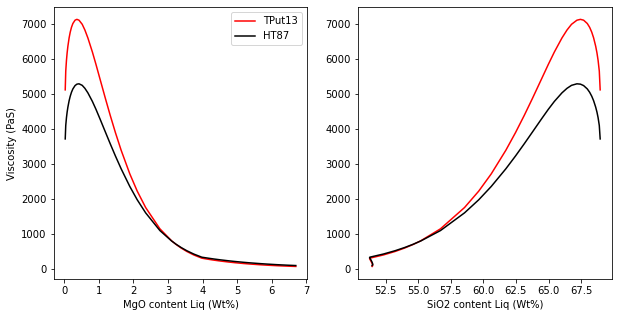

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Calc_Puteq13['MgO_Liq'], Calc_Puteq13['n_melt'], '-r', label='TPut13')
ax2.plot(Calc_Puteq13['SiO2_Liq'], Calc_Puteq13['n_melt'], '-r')


ax1.plot(Calc_ExcelT['MgO_Liq'], Calc_ExcelT['n_melt'], '-k', label='HT87')
ax2.plot(Calc_ExcelT['SiO2_Liq'], Calc_ExcelT['n_melt'], '-k')
ax1.legend()
ax1.set_ylabel('Viscosity (PaS)')
ax1.set_xlabel('MgO content Liq (Wt%)')
ax2.set_xlabel('SiO2 content Liq (Wt%)')

## With different F2O contents
- By default, we perform calculations with no F, to use the same input structure as the rest of the liquids
- However, Giordano parameterize in terms of F2O, so you can enter this straight in the function
- We have 2 functions, allowing you to convert from F2O to F and back

In [21]:
F2O_calc=pt.convert_F_to_F2O(F_ppm=1000)
F2O_calc

0.14210723396066502

In [22]:
F_calc=pt.convert_F2O_to_F_ppm(F2O_wt=F2O_calc)
F_calc

1000.0

In [23]:
WithF=pt.calculate_viscosity_giordano_2008(liq_comps=Liqs2, 
                                    T=Liqs_input2['Temp HT1987_K'],
                                     F2O_content=F2O_calc)

Text(0.5, 0, 'MgO content Liq')

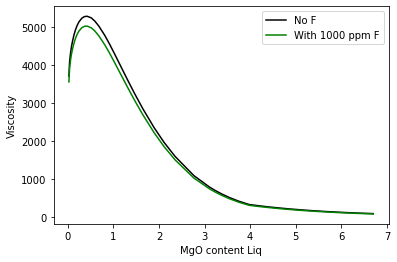

In [25]:
plt.plot( Calc_ExcelT['MgO_Liq'], Calc_ExcelT['n_melt'], '-k', label='No F')
plt.plot( WithF['MgO_Liq'], WithF['n_melt'], '-g', label='With 1000 ppm F')
plt.legend()
plt.ylabel('Viscosity')
plt.xlabel('MgO content Liq')